# Análise Exploratória Inicial dos Dados

## Importando as dependências

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from hydra import initialize, compose
from omegaconf import OmegaConf

with initialize(version_base=None, config_path="../config/"):
    cfg = compose(config_name='main')

## Carregando o DataSet 

In [132]:
df = pd.read_csv(f"../{cfg.data.raw}")

## Formato do DataSet

In [133]:
# Informação do DataFrame e os objetos reconhecidos pelo pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [134]:
# Formato do DataFrame
df.shape

(5842, 2)

In [135]:
# Formato das colunas
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [136]:
# Quantidade de valores nulos
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [137]:
# Quantidade de valores duplicados
df.duplicated().sum()

6

## Análise da Coluna `Sentence`

### Menor Sentença

In [138]:
# Menor quantidade de caracteres de uma senteça e seu formato
min_idx = df['Sentence'].str.len().idxmin()
min_sen = df.loc[min_idx, 'Sentence']
min_sen_length = len(min_sen)

print(f"O tamanho da menor sentença é {min_sen_length} caracteres e ela é '{min_sen}'")

O tamanho da menor sentença é 9 caracteres e ela é 'Welcome !'


### Maior sentença

In [139]:
# Menor quantidade de caracteres de uma senteça e seu formato
max_idx = df['Sentence'].str.len().idxmax()
max_sen = df.loc[max_idx, 'Sentence']
max_sen_length = len(max_sen)

print(f"O tamanho da maior sentença é {max_sen_length} caracteres e ela é '{max_sen}'")

O tamanho da maior sentença é 315 caracteres e ela é 'Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM .'


### Amplitude das quantidades de caracteres das sentenças

In [140]:
amp_tot = max_sen_length - min_sen_length
amp_tot

306

### Distribuição dos Tamanhos

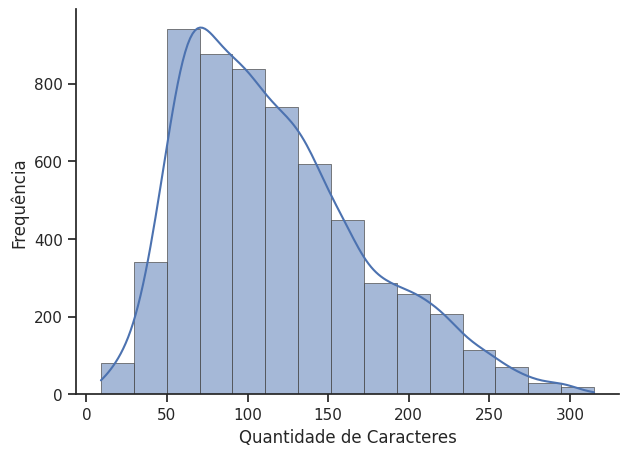

In [141]:
# Tamanho do vector coluna
size = df.size

# Número de grupos
k = math.ceil(1 + 3.3 * math.log10(size))

# Amplitude de cada classe
amp = amp_tot / k

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

df['Tamanho'] = df['Sentence'].str.len()

sns.histplot(
    df,
    x="Tamanho",
    bins=k,
    binwidth=amp,
    edgecolor=".3",
    linewidth=.5,
    kde=True,
)

ax.set_ylabel("Frequência")
ax.set_xlabel("Quantidade de Caracteres")

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

### Nuvem de palavras mais frequentes


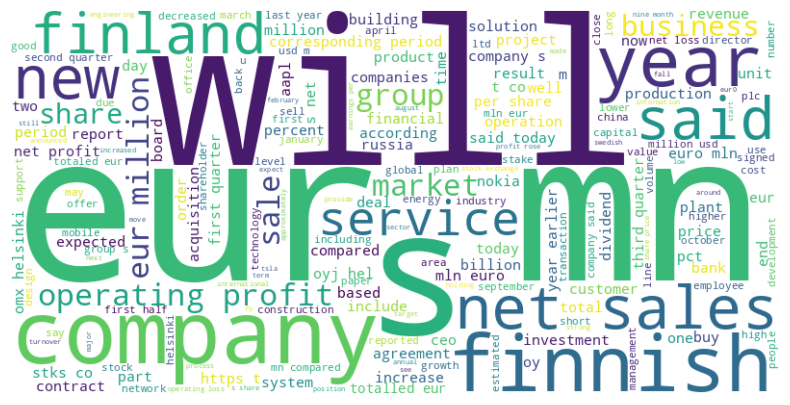

In [142]:
from wordcloud import WordCloud

# Palavras mais frequentes sem pré-processamento

# Deixar todas as palavras em lower case
lower_words = [word.lower() for word in df['Sentence']]

text = " ".join(lower_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Análise da Coluna `Sentiment`

### Valores da variável categórica Sentimentos

In [143]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

### Visualização da frequência das categorias

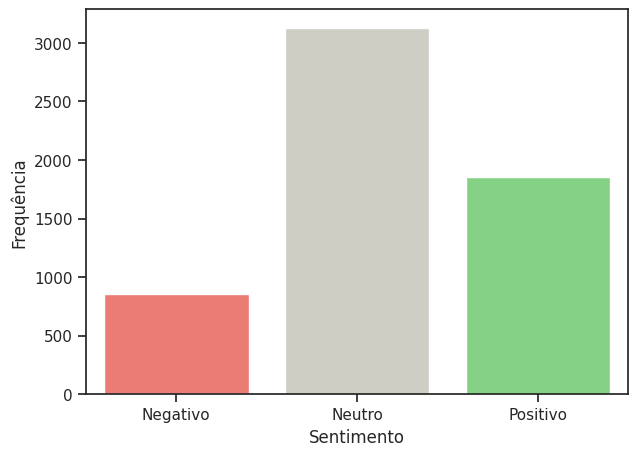

In [144]:
order = ['negative', 'neutral', 'positive']
palette = ['#ff6961', '#cfcfc4', '#77dd77']
labels = {'negative': 'Negativo', 'neutral': 'Neutro', 'positive': 'Positivo'}

plt.figure(figsize=(7, 5))

sns.countplot(
    data=df,
    x="Sentiment",
    order=order,
    palette=palette
)

plt.xticks(range(len(order)), [labels[x] for x in order])
plt.xlabel("Sentimento")
plt.ylabel("Frequência")

plt.show()